## PROBLEM STATEMENT :


### A Comparative Study on Machine Learning and Deep Learning Algorithms for Heart Disease Prediction.

## OBJECTIVES

- In this project we aim to develop Machine Learning Algorithms in predicting heart disease in patients.
- We are using various ML and DL algorithms.
- The method providing not just highest accuracy, but optimum values of accuracy, sensitivity and specificity will be selected.
- The proposed Stacked Ensemble/ANN will get better accuracy, sensitivity and specificity scores than that of existing ML models.

__BLOCK DIAGRAM OF METHODOLOGY__

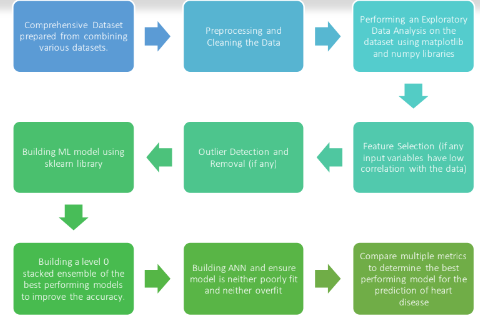

## Timeline

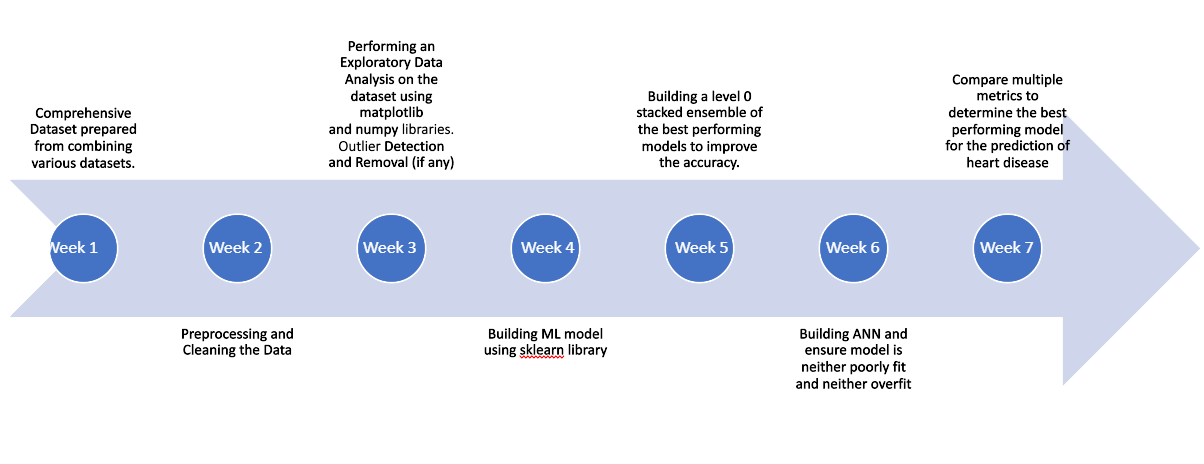

This notebook is divided into 13 major steps which are as follows:

1. [Data description](#data-desc)
2. [Importing Libraries & setting up environment](#imp-lib)
3. [Loading dataset](#data-load)
4. [Data Cleaning & Preprocessing](#data-prep)
5. [Exploratory Data Analysis](#data-eda)
6. [Outlier Detection & Removal](#data-out)
7. [Training & Test Split](#data-train)
8. [Cross Validation](#cross-val)
9. [Model Building](#data-model)

## Heart Disease 
Coronary Heart Disease (CHD) is obstruction of the coronary arteries with
symptoms such as angina, chest pain, and heart attacks.
It is caused by cholesterol buildup in the wall of the arteries that supply
blood to the heart.

Cardiovascular diseases (CVDs) are the leading cause of death globally, taking an estimated 17.9 million lives each year. CVDs are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions. More than four out of five CVD deaths are due to heart attacks and strokes, and one third of these deaths occur prematurely in people under 70 years of age.

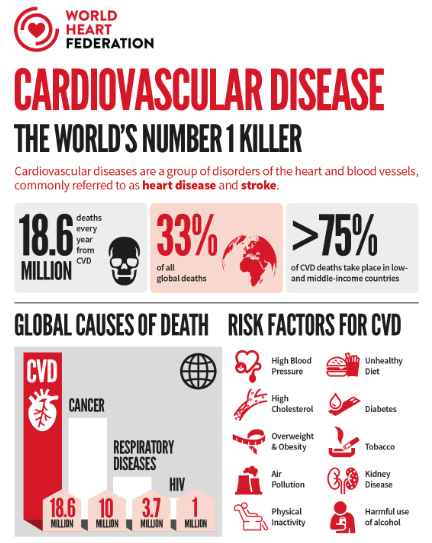

## Dataset description 
This dataset consists of 13 features and a target variable. It has 7 categorical variables and 6 numeric variables. The detailed description of all the features are as follows:

**1. Age:** Patients Age in years (Numeric)<br>
**2. Sex:** Gender of patient (Male - 1, Female - 0) (Categorical)<br>
**3. Chest Pain Type:** Type of chest pain experienced by patient categorized into 1 typical, 2 typical angina, 3 non-        anginal pain, 4 asymptomatic (Categorical)<br>
**4. resting bp s:** Level of blood pressure at resting mode in mm/HG (Numeric)<br>
**5. cholestrol:** Serum cholestrol in mg/dl (Numeric)<br>
**6. fasting blood sugar:** Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Categorical)<br>
**7. resting ecg:** Result of electrocardiogram while at rest are represented in 3 distinct values 0 : Normal 1: Abnormality in ST-T wave 2: Left ventricular hypertrophy (Categorical)<br>
**8. max heart rate:** Maximum heart rate achieved (Numeric)<br>
**9. exercise angina:** Angina induced by exercise 0 depicting NO 1 depicting Yes (Categoricall)<br>
**10. oldpeak:** Exercise induced ST-depression in comparison with the state of rest (Numeric)<br>
**11. ST slope:** ST segment measured in terms of slope during peak exercise 0: Normal 1: Upsloping 2: Flat 3: Downsloping (Categorical)<br>
**12. ca:** number of major vessels (0-3) colored by flourosopy (Numeric)<br>
**13. Thalassemia:** 3 = normal; 6 = fixed defect; 7 = reversable defect (Categorical)<br>

#### Target variable
**14. target:** Presence of CAD: 1=Present; 0 = Absent <br>


## 2. Importing Libraries

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
import xgboost as xgb
from scipy import stats
from vecstack import stacking
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score,recall_score
import tensorflow as tf

# 3. Loading Dataset

In [2]:
dt = pd.read_csv('results.csv')

These are some of the sample entries of dataset

In [3]:
dt.head()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  29.0  1.0  2.0     130.0  204.0  0.0      2.0    202.0    0.0      0.0   
1  34.0  1.0  1.0     118.0  182.0  0.0      2.0    174.0    0.0      0.0   
2  34.0  0.0  2.0     118.0  210.0  0.0      0.0    192.0    0.0      0.7   
3  35.0  1.0  2.0     122.0  192.0  0.0      0.0    174.0    0.0      0.0   
4  35.0  0.0  4.0     138.0  183.0  0.0      0.0    182.0    0.0      1.4   

   slope   ca  thal  target  
0    1.0  0.0   3.0       0  
1    1.0  0.0   3.0       0  
2    1.0  0.0   3.0       0  
3    1.0  0.0   3.0       0  
4    1.0  0.0   3.0       0

Some categorical features must be categorised according to their description for their EDA

## 4. Data Cleaning & Preprocessing 
In this step, columns will be changed as some of the columns do not have well defined naming pattern and then the features will be encoded into categorical variables

In [4]:
# renaming features to proper name
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','coloured_vessels','Thalassemia','target']
dt.head()

age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0  29.0  1.0              2.0                   130.0        204.0   
1  34.0  1.0              1.0                   118.0        182.0   
2  34.0  0.0              2.0                   118.0        210.0   
3  35.0  1.0              2.0                   122.0        192.0   
4  35.0  0.0              4.0                   138.0        183.0   

   fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  \
0                  0.0       2.0                    202.0   
1                  0.0       2.0                    174.0   
2                  0.0       0.0                    192.0   
3                  0.0       0.0                    174.0   
4                  0.0       0.0                    182.0   

   exercise_induced_angina  st_depression  st_slope  coloured_vessels  \
0                      0.0            0.0       1.0               0.0   
1                      0.0            0.0       1.0               0.0   
2                      0.0            0.7       1.0               0.0   
3                      0.0            0.0       1.0               0.0   
4                      0.0            1.4       1.0               0.0   

   Thalassemia  target  
0          3.0       0  
1          3.0       0  
2          3.0       0  
3          3.0       0  
4          3.0       0

In [5]:
# converting features to categorical features 

dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 4] = 'asymptomatic'



dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'


dt['st_slope'][dt['st_slope'] == 0] = 'normal'
dt['st_slope'][dt['st_slope'] == 1] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 2] = 'flat'
dt['st_slope'][dt['st_slope'] == 3] = 'downsloping'

dt['Thalassemia'][dt['Thalassemia'] == 3] = 'normal'
dt['Thalassemia'][dt['Thalassemia'] == 6] = 'fixed defect'
dt['Thalassemia'][dt['Thalassemia'] == 7] = 'reversible defect'

dt["sex"] = dt.sex.apply(lambda  x:'male' if x==1 else 'female')

In [6]:
# checking the top 5 entries of dataset after feature encoding
dt.head()

age     sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0  29.0    male  atypical angina                   130.0        204.0   
1  34.0    male   typical angina                   118.0        182.0   
2  34.0  female  atypical angina                   118.0        210.0   
3  35.0    male  atypical angina                   122.0        192.0   
4  35.0  female     asymptomatic                   138.0        183.0   

   fasting_blood_sugar                      rest_ecg  max_heart_rate_achieved  \
0                  0.0  left ventricular hypertrophy                    202.0   
1                  0.0  left ventricular hypertrophy                    174.0   
2                  0.0                        normal                    192.0   
3                  0.0                        normal                    174.0   
4                  0.0                        normal                    182.0   

   exercise_induced_angina  st_depression   st_slope  coloured_vessels  \
0                      0.0            0.0  upsloping               0.0   
1                      0.0            0.0  upsloping               0.0   
2                      0.0            0.7  upsloping               0.0   
3                      0.0            0.0  upsloping               0.0   
4                      0.0            1.4  upsloping               0.0   

  Thalassemia  target  
0      normal       0  
1      normal       0  
2      normal       0  
3      normal       0  
4      normal       0

Features are encoded sucessfully to their respective categories. Next missing entries are checked

In [7]:
## Checking missing entries in the dataset columnwise
dt.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
coloured_vessels           0
Thalassemia                0
target                     0
dtype: int64

So, there are no missing entries in the dataset. Next step is exploring the dataset by performing detailed EDA

## 5. Exploratory Data Analysis (EDA) <a id='data-eda'></a>

In [8]:
# first checking the shape of the dataset
dt.shape

(569, 14)

So, there are total 569 records and 13 features with 1 target variable. Checking the summary of numerical and categorical features.

In [9]:
# summary statistics of numerical columns
dt.describe(include =[np.number])

age  resting_blood_pressure  cholesterol  fasting_blood_sugar  \
count  569.000000              569.000000   569.000000           569.000000   
mean    54.479789              131.539543   248.149385             0.231986   
std      9.059857               17.787149    52.106647             0.422471   
min     29.000000               94.000000   100.000000             0.000000   
25%     48.000000              120.000000   212.000000             0.000000   
50%     55.000000              130.000000   243.000000             0.000000   
75%     61.000000              140.000000   277.000000             0.000000   
max     77.000000              200.000000   564.000000             1.000000   

       max_heart_rate_achieved  exercise_induced_angina  st_depression  \
count               569.000000               569.000000     569.000000   
mean                149.493849                 0.330404       1.054482   
std                  23.122539                 0.470773       1.153463   
min                  71.000000                 0.000000       0.000000   
25%                 133.000000                 0.000000       0.000000   
50%                 153.000000                 0.000000       0.800000   
75%                 166.000000                 1.000000       1.600000   
max                 202.000000                 1.000000       6.200000   

       coloured_vessels      target  
count        569.000000  569.000000  
mean           2.581722    0.718805  
std            2.507892    0.449978  
min            0.000000    0.000000  
25%            0.000000    0.000000  
50%            3.000000    1.000000  
75%            3.000000    1.000000  
max            7.000000    1.000000

From above description resting_blood_pressure and cholestrol have some outliers as they have minimum value of 0 whereas cholestrol has outlier on upper side also having maximum value of 564.

In [10]:
# summary statistics of categorical columns
dt.describe(include =[np.object])

sex chest_pain_type                      rest_ecg   st_slope  \
count    569             569                           569        569   
unique     2               4                             4          3   
top     male    asymptomatic  left ventricular hypertrophy  upsloping   
freq     386             273                           268        269   

       Thalassemia  
count          569  
unique           3  
top         normal  
freq           316

### Distribution of Heart disease (target variable)

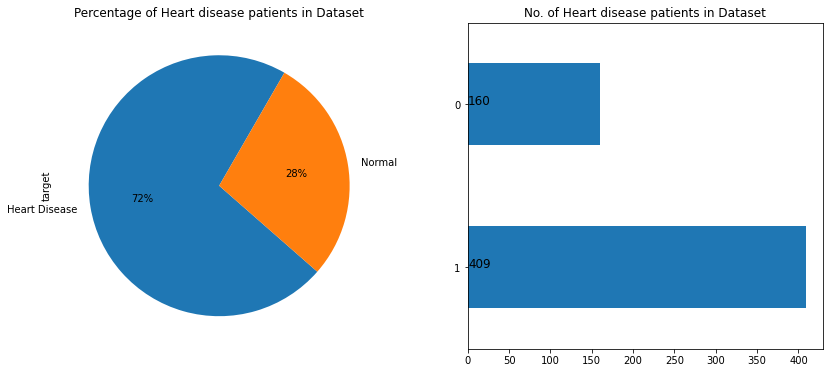

In [11]:
# Plotting attrition of employees
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = dt['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients',
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = dt["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(dt["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

The dataset is having 409 heart disease patients and 160 normal patients

### Checking Gender & Agewise Distribution

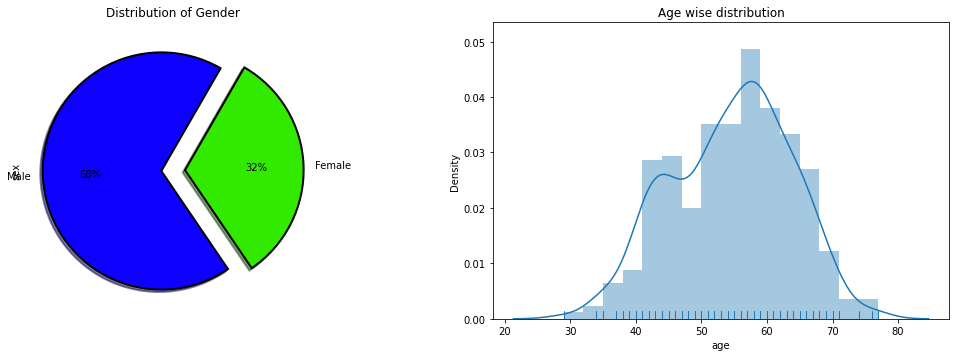

In [12]:
plt.figure(figsize=(18,12))
plt.subplot(221)
dt["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(dt['age'], rug=True)
plt.title("Age wise distribution")
plt.show()

In this dataset, male percentage is higher than females. Average age of patients is around 58.

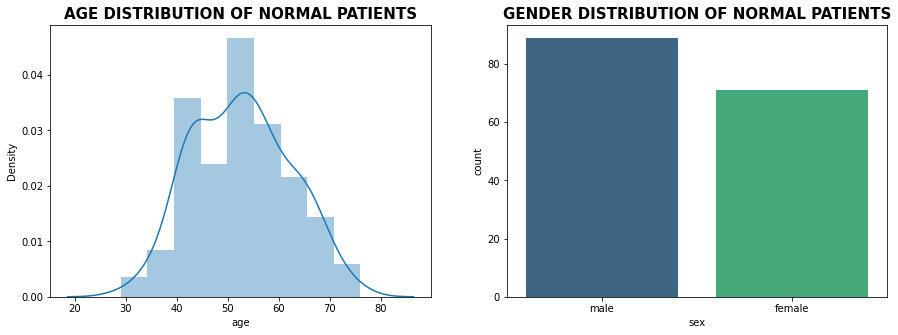

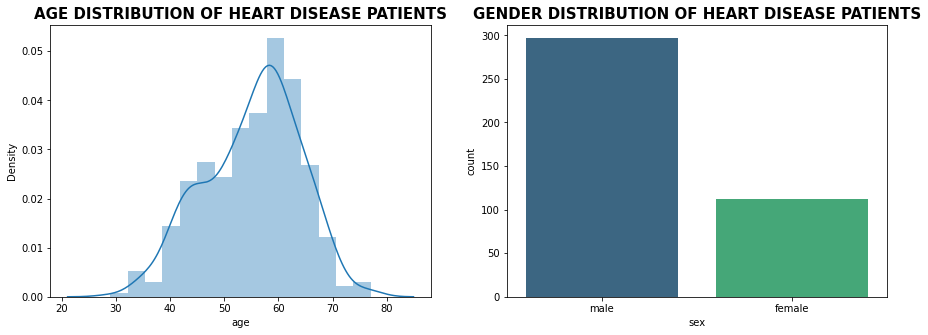

In [13]:
attr_1=dt[dt['target']==1]
attr_0=dt[dt['target']==0]
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

Mean age for heart disease patients is around 58 to 60 years and it has affected male patients more than female.

### Distribution of Chest Pain Type

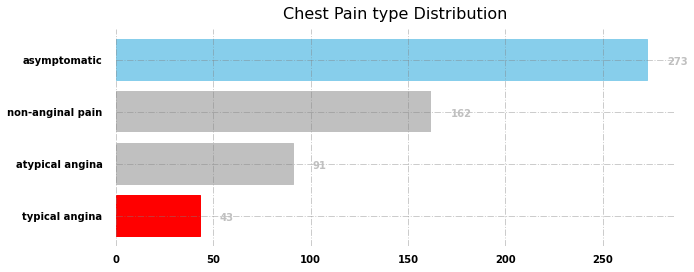

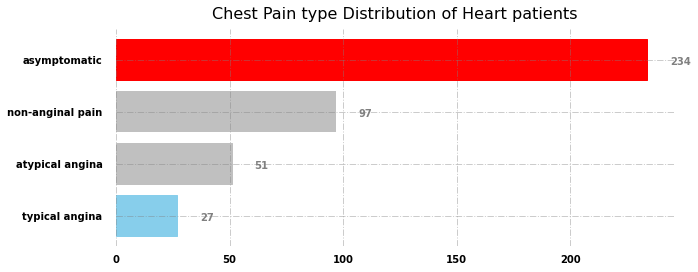

In [14]:
fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=dt.chest_pain_type.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('skyblue')
mn[3].set_color('red')
mn[2].set_color('silver')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Chest Pain type Distribution',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='silver')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()


fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=attr_1.chest_pain_type.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('red')
mn[3].set_color('skyblue')
mn[2].set_color('silver')

# Remove axes spines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Chest Pain type Distribution of Heart patients',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()

In [15]:
#Exploring the Heart Disease patients based on Chest Pain Type
plot_criteria= ['chest_pain_type', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

**57.2%** of the chest pain type of the heart disease patients have asymptomatic chest pain. 

Asymptomatic heart attacks medically known as **silent myocardial infarction (SMI)** annually accounts for around 45-50% of morbidities due to cardiac ailments and even premature deaths in India. The incidences among middle aged people experiencing SMI is twice likely to develop in males than females. The symptoms of SMI being very mild in comparison to an actual heart attack; it is described as a silent killer. Unlike the symptoms in a normal heart attack which includes extreme chest pain, stabbing pain in the arms, neck & jaw, sudden shortness of breath, sweating and dizziness, the symptoms of SMI are very brief and hence confused with regular discomfort and most often ignored.

[reference](https://www.maxhealthcare.in/blogs/cardiology/rise-cases-asymptomatic-heart-attacks-amongst-middle-aged-people)

### Distribution of Rest ECG

In [16]:
#Exploring the Heart Disease patients based on REST ECG
plot_criteria= ['rest_ecg', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

![](https://i.ibb.co/R3V4tWC/heart1.png)

An electrocardiogram records the electrical signals in your heart. It's a common test used to detect heart problems and monitor the heart's status in many situations. Electrocardiograms — also called ECGs or EKGs. but ECG has limits. It measures heart rate and rhythm—but it doesn’t necessarily show blockages in the arteries. Around 14% heart disease patients have normal ECG

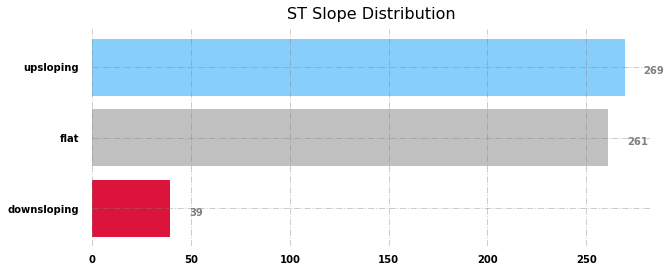

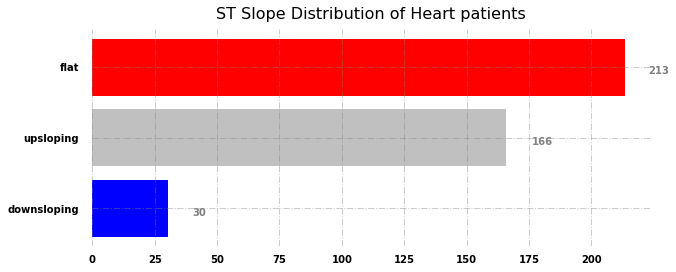

In [17]:
fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=dt.st_slope.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('lightskyblue')
mn[2].set_color('crimson')


# Remove axes spines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('ST Slope Distribution',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()


fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=attr_1.st_slope.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('red')
mn[2].set_color('blue')


# Remove axes spines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('ST Slope Distribution of Heart patients',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()

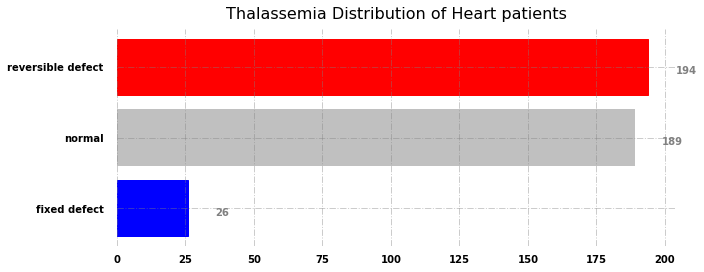

In [18]:
fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=attr_1.Thalassemia.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('red')
mn[2].set_color('blue')


# Remove axes spines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Thalassemia Distribution of Heart patients',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()

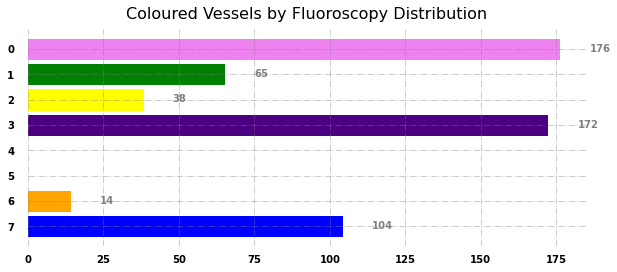

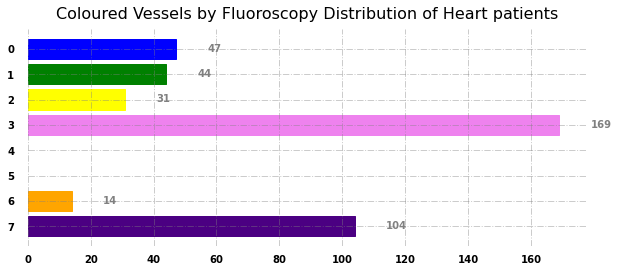

In [19]:
fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=dt.coloured_vessels.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('violet')
mn[1].set_color('indigo')
mn[2].set_color('blue')
mn[3].set_color('green')
mn[4].set_color('yellow')
mn[5].set_color('orange')


# Remove axes spines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Coloured Vessels by Fluoroscopy Distribution',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()

fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=attr_1.coloured_vessels.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('violet')
mn[1].set_color('indigo')
mn[2].set_color('blue')
mn[3].set_color('green')
mn[4].set_color('yellow')
mn[5].set_color('orange')



# Remove axes spines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Coloured Vessels by Fluoroscopy Distribution of Heart patients',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()

It can be observed that more coloured vessels in fluoroscopy (>=2) indicates heart disease in 99.97% of the cases

In [20]:
#Exploring the Heart Disease patients based on ST Slope
plot_criteria= ['st_slope', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

![](https://i.ibb.co/jw2P8Nr/ST-segment-depression-upsloping-downsloping-horizontal.png)

The ST segment /heart rate slope (ST/HR slope), has been proposed as a more accurate ECG criterion for diagnosing significant coronary artery disease (CAD) in most of the research papers. 

Upsloping is positive sign as 64.38% of the normal patients have upslope where as 40.6% heart patients have flat sloping.

### Distribution of Numerical features

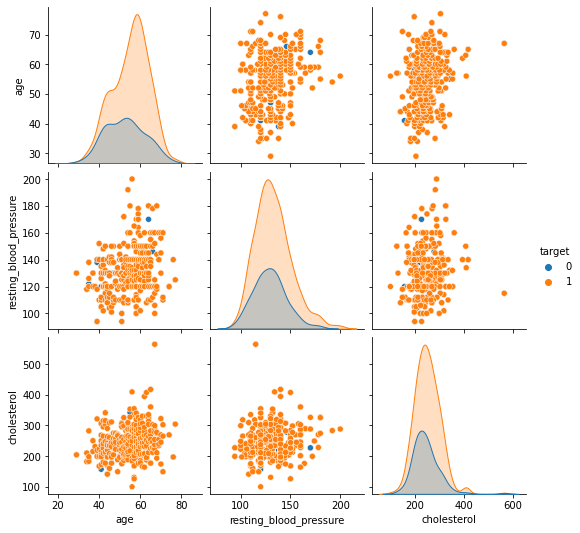

In [21]:
sns.pairplot(dt, hue = 'target', vars = ['age', 'resting_blood_pressure', 'cholesterol'] )

From the above plot it is clear that as the age increases chances of heart disease increases

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='cholesterol'>

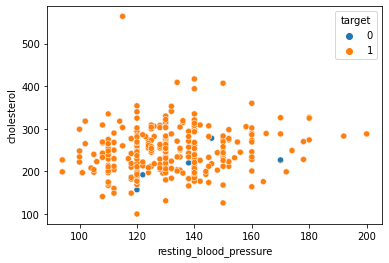

In [22]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'cholesterol', hue = 'target', data = dt)

Some outliers are observed as cholestrol is around 600 for one patient and resting BP is around 200 for another patient. These outliers will be removed

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='age'>

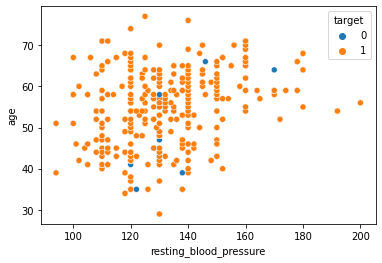

In [23]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'age', hue = 'target', data = dt)

## 6. Outlier Detection & Removal <a id='data-out'></a>

### Detecting outlier using z-score
![](https://i.ibb.co/bgRRWrp/outlier.jpg)
![](https://i.ibb.co/jDHP7Sj/Z-score-formula.jpg)

In [24]:
# filtering numeric features as age , resting bp, cholestrol and max heart rate achieved has outliers as per EDA

dt_numeric = dt[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']]

In [25]:
dt_numeric.head()

age  resting_blood_pressure  cholesterol  max_heart_rate_achieved
0  29.0                   130.0        204.0                    202.0
1  34.0                   118.0        182.0                    174.0
2  34.0                   118.0        210.0                    192.0
3  35.0                   122.0        192.0                    174.0
4  35.0                   138.0        183.0                    182.0

In [26]:
# calculating zscore of numeric columns in the dataset
z = np.abs(stats.zscore(dt_numeric))
print(z)

          age  resting_blood_pressure  cholesterol  max_heart_rate_achieved
0    2.814858                0.086630     0.848034                 2.272776
1    2.262487                0.761868     1.270617                 1.060771
2    2.262487                0.761868     0.732785                 1.839917
3    2.152013                0.536788     1.078534                 1.060771
4    2.152013                0.363529     1.251409                 1.407058
..        ...                     ...          ...                      ...
564  1.825056                1.099487     1.904491                 1.060238
565  1.825056                1.601465     1.034379                 0.541340
566  2.156478                0.649328     0.400505                 1.233382
567  2.377427                0.476068     0.982493                 1.449811
568  2.487901                0.367979     1.072795                 0.541340

[569 rows x 4 columns]


From these points it is difficult to determine which points are outliers, hence threshold need to be defined

In [27]:
# Defining threshold for filtering outliers 
threshold = 3
print(np.where(z > 3))

(array([132, 149, 156, 244, 261, 274, 276, 416, 439, 442, 515, 534, 547,
       550], dtype=int64), array([1, 2, 1, 2, 2, 2, 3, 1, 1, 2, 2, 2, 2, 3], dtype=int64))


The first array contains the list of row numbers and second array respective column numbers, which mean z[30][2] have a Z-score higher than 3. There are total 14 data points which are outliers.

In [28]:
#filtering outliers retaining only those data points which are below threshhold
dt = dt[(z < 3).all(axis=1)]

In [29]:
# checking shape of dataset after outlier removal
dt.shape

(555, 14)

All the 14 data points which are outliers are now removed.

First encoding categorical variables as dummy variables and segregate feature and target variable, before splitting them into training and test set

In [30]:
## encoding categorical variables
dt = pd.get_dummies(dt, drop_first=True)

dt.head()


age  resting_blood_pressure  cholesterol  fasting_blood_sugar  \
0  29.0                   130.0        204.0                  0.0   
1  34.0                   118.0        182.0                  0.0   
2  34.0                   118.0        210.0                  0.0   
3  35.0                   122.0        192.0                  0.0   
4  35.0                   138.0        183.0                  0.0   

   max_heart_rate_achieved  exercise_induced_angina  st_depression  \
0                    202.0                      0.0            0.0   
1                    174.0                      0.0            0.0   
2                    192.0                      0.0            0.7   
3                    174.0                      0.0            0.0   
4                    182.0                      0.0            1.4   

   coloured_vessels  target  sex_male  chest_pain_type_atypical angina  \
0               0.0       0         1                                1   
1               0.0       0         1                                0   
2               0.0       0         0                                1   
3               0.0       0         1                                1   
4               0.0       0         0                                0   

   chest_pain_type_non-anginal pain  chest_pain_type_typical angina  \
0                                 0                               0   
1                                 0                               1   
2                                 0                               0   
3                                 0                               0   
4                                 0                               0   

   rest_ecg_ST-T wave abnormality  rest_ecg_left ventricular hypertrophy  \
0                               0                                      1   
1                               0                                      1   
2                               0                                      0   
3                               0                                      0   
4                               0                                      0   

   rest_ecg_normal  st_slope_flat  st_slope_upsloping  Thalassemia_normal  \
0                0              0                   1                   1   
1                0              0                   1                   1   
2                1              0                   1                   1   
3                1              0                   1                   1   
4                1              0                   1                   1   

   Thalassemia_reversible defect  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0

In [31]:
# checking the shape of dataset
dt.shape

(555, 20)

In [32]:
# segregating dataset into features i.e., X and target variables i.e., y
X = dt.drop(['target'],axis=1)
y = dt['target']

## 7. Train Test Split <a id='data-train'></a>

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(444, 19)
(444,)
------------Test Set------------------
(111, 19)
(111,)


### Feature normalization
Normalizing all the numeric feature in the range of 0 to 1

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','coloured_vessels']] = scaler.fit_transform(X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','coloured_vessels']])
X_train.head()

age  resting_blood_pressure  cholesterol  fasting_blood_sugar  \
283  1.525121                2.843619     0.640575                  1.0   
305 -1.877662               -0.651698    -0.640086                  0.0   
492  0.646984               -0.069145     0.184746                  1.0   
566  2.183725               -0.651698     0.532044                  1.0   
193  0.537217                0.513408    -1.464918                  0.0   

     max_heart_rate_achieved  exercise_induced_angina  st_depression  \
283                 0.033691                      1.0       0.433630   
305                 0.893402                      0.0      -0.925818   
492                -0.224222                      1.0       0.263699   
566                -1.212890                      1.0      -0.755887   
193                 0.549518                      1.0      -0.925818   

     coloured_vessels  sex_male  chest_pain_type_atypical angina  \
283         -1.020241         1                                0   
305          0.172877         0                                0   
492          1.763700         1                                0   
566          0.172877         0                                1   
193         -0.622535         1                                0   

     chest_pain_type_non-anginal pain  chest_pain_type_typical angina  \
283                                 1                               0   
305                                 1                               0   
492                                 0                               0   
566                                 0                               0   
193                                 0                               0   

     rest_ecg_ST-T wave abnormality  rest_ecg_left ventricular hypertrophy  \
283                               0                                      1   
305                               1                                      0   
492                               1                                      0   
566                               1                                      0   
193                               0                                      0   

     rest_ecg_normal  st_slope_flat  st_slope_upsloping  Thalassemia_normal  \
283                0              1                   0                   0   
305                0              0                   1                   1   
492                0              0                   1                   0   
566                0              0                   1                   1   
193                1              0                   1                   0   

     Thalassemia_reversible defect  
283                              1  
305                              0  
492                              1  
566                              0  
193                              1

In [36]:
X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','coloured_vessels']] = scaler.transform(X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','coloured_vessels']])
X_test.head()

age  resting_blood_pressure  cholesterol  fasting_blood_sugar  \
85  -0.450688                0.513408    -0.249376                  0.0   
133 -0.011620               -1.350762     1.400288                  0.0   
96  -0.340921               -2.166336    -0.379612                  0.0   
107 -0.231154               -0.768209    -1.269563                  0.0   
141  0.098148                0.222131     0.119628                  0.0   

     max_heart_rate_achieved  exercise_induced_angina  st_depression  \
85                  0.592504                      0.0      -0.416025   
133                 0.291605                      0.0      -0.925818   
96                  0.205634                      1.0      -0.925818   
107                 1.753113                      0.0      -0.925818   
141                 0.506532                      0.0       0.263699   

     coloured_vessels  sex_male  chest_pain_type_atypical angina  \
85          -0.622535         1                                0   
133         -1.020241         1                                1   
96          -0.622535         1                                0   
107         -1.020241         1                                0   
141         -1.020241         0                                1   

     chest_pain_type_non-anginal pain  chest_pain_type_typical angina  \
85                                  1                               0   
133                                 0                               0   
96                                  1                               0   
107                                 0                               1   
141                                 0                               0   

     rest_ecg_ST-T wave abnormality  rest_ecg_left ventricular hypertrophy  \
85                                0                                      0   
133                               0                                      0   
96                                0                                      0   
107                               0                                      1   
141                               0                                      1   

     rest_ecg_normal  st_slope_flat  st_slope_upsloping  Thalassemia_normal  \
85                 1              1                   0                   0   
133                1              0                   1                   0   
96                 1              0                   1                   0   
107                0              1                   0                   0   
141                0              1                   0                   1   

     Thalassemia_reversible defect  
85                               1  
133                              1  
96                               1  
107                              0  
141                              0

## 8. Model building <a id='data-model'></a>

### Logistic Regression

In [37]:
lr_l2 = LogisticRegression(penalty='l2',random_state=0)
lr_l2.fit(X_train,y_train)
y_pred_lr = lr_l2.predict(X_test)

### K Nearest Neighbors

In [38]:
knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

### Multi Layer Perceptron

In [39]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

### XGBoost (n_estimators=500)

In [40]:
xgb1 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=500)
xgb1.fit(X_train,y_train)
y_pred_xgb = xgb1.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

0.9009009009009009

### Support Vector Classifier (kernel='linear')

In [41]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

### Naive Bayes

In [42]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)

### Extra Tree Classifier

In [43]:
et = ExtraTreesClassifier(n_estimators= 100)
et.fit(X_train,y_train)
y_pred_et = et.predict(X_test)

### Gradient Boosting 

In [44]:
gb = GradientBoostingClassifier(n_estimators=400,learning_rate=0.01)
gb.fit(X_train,y_train)
y_pred_gb = gb.predict(X_test)

### Random Forest Classifier

In [45]:
rf = RandomForestClassifier(n_estimators= 200)
rf.fit(X_train,y_train)
y_pred_rf = et.predict(X_test)

### Stacked Ensemble

In [46]:
import xgboost
# selecting list of top performing models to be used in stacked ensemble method
models = [
    ExtraTreesClassifier(n_estimators= 200),
    RandomForestClassifier(n_estimators= 200),
    GradientBoostingClassifier(n_estimators=400,learning_rate=0.01),
    SVC(kernel='rbf',gamma='auto',probability=True),
    xgb.XGBClassifier(learning_rate =0.1,n_estimators=500),
    LogisticRegression(penalty='l2',random_state=0),
]

In [47]:
S_train, S_test = stacking(models,                   
                           X_train, y_train, X_test,   
                           regression=False, 
                           mode='oof_pred_bag', 
                           save_dir=None, 
                           metric=accuracy_score, 
                           n_folds=5,
                           shuffle=True,
                           stratified= True,
                           random_state=2,
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [6]

model  0:     [ExtraTreesClassifier]
    fold  0:  [0.87640449]
    fold  1:  [0.95505618]
    fold  2:  [0.92134831]
    fold  3:  [0.84269663]
    fold  4:  [0.89772727]
    ----
    MEAN:     [0.89864658] + [0.03827104]
    FULL:     [0.89864865]

model  1:     [RandomForestClassifier]
    fold  0:  [0.91011236]
    fold  1:  [0.93258427]
    fold  2:  [0.87640449]
    fold  3:  [0.84269663]
    fold  4:  [0.85227273]
    ----
    MEAN:     [0.88281410] + [0.03407502]
    FULL:     [0.88288288]

model  2:     [GradientBoostingClassifier]
    fold  0:  [0.88764045]
    fold  1:  [0.93258427]
    fold  2:  [0.88764045]
    fold  3:  [0.86516854]
    fold  4:  [0.86363636]
    ----
    MEAN:     [0.88733401] + [0.02490245]
    FULL:     [0.88738739]

model  3:     [SVC]
    fold  0:  [0.89887640]
    fold  1:  [0.94382022]
    fold  2:  [0.88764045]
    fold  

In [48]:
se_model = MLPClassifier(random_state=1, max_iter=230) 
se_model = se_model.fit(S_train, y_train)
y_pred_se = se_model.predict(S_test)

### Artificial Neural Network

In [49]:
tf.random.set_seed(1)
initializer = tf.keras.initializers.Ones()
ann = tf.keras.models.Sequential()

In [50]:
ann.add(tf.keras.layers.Dense(units=19,activation='sigmoid',input_shape=(19,),kernel_initializer=initializer))

In [51]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [52]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [53]:
ann.fit(X_train, y_train, batch_size = 50, epochs = 400)

Epoch 1/400
9/9 [==============================] - 0s 2ms/step - loss: 0.5892 - accuracy: 0.7095
Epoch 2/400
9/9 [==============================] - 0s 2ms/step - loss: 0.5841 - accuracy: 0.7095
Epoch 3/400
9/9 [==============================] - 0s 1ms/step - loss: 0.5815 - accuracy: 0.7095
Epoch 4/400
9/9 [==============================] - 0s 2ms/step - loss: 0.5793 - accuracy: 0.7117
Epoch 5/400
9/9 [==============================] - 0s 2ms/step - loss: 0.5770 - accuracy: 0.7140
Epoch 6/400
9/9 [==============================] - 0s 2ms/step - loss: 0.5749 - accuracy: 0.7162
Epoch 7/400
9/9 [==============================] - 0s 2ms/step - loss: 0.5729 - accuracy: 0.7207
Epoch 8/400
9/9 [==============================] - 0s 2ms/step - loss: 0.5708 - accuracy: 0.7230
Epoch 9/400
9/9 [==============================] - 0s 2ms/step - loss: 0.5687 - accuracy: 0.7275
Epoch 10/400
9/9 [==============================] - 0s 2ms/step - loss: 0.5667 - accuracy: 0.7297
Epoch 11/400
9/9 [===========

In [54]:
y_pred_ann = ann.predict(X_test)
y_pred_ann = np.where(y_pred_ann > 0.5,1,0).flatten()

4/4 [==============================] - 0s 2ms/step


In [55]:
model_results =pd.DataFrame(columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'Recall Score','F1 Score'])

In [56]:
data ={ 'ANN': y_pred_ann,'Stacked Ensemble': y_pred_se, 'LR_L2': y_pred_lr,'Extra tree classifier': y_pred_et, 'XGB': y_pred_xgb, 'Gradient Boosting': y_pred_gb ,'SVC': y_pred_svc, 'LR_L2': y_pred_lr}
models = pd.DataFrame(data) 
 
for column in models:
    CM=confusion_matrix(y_test,models[column])
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    sensitivity = TP/(TP+FN)
    acc= accuracy_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec=recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,sensitivity,specificity, rec, f1]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'Recall Score','F1 Score'])
    model_results = model_results.append(results, ignore_index = True)
model_results

Model  Accuracy  Precision  Sensitivity  Specificity  \
0                    ANN  0.954955   0.975309     0.963415     0.931034   
1       Stacked Ensemble  0.918919   0.929412     0.963415     0.793103   
2                  LR_L2  0.936937   0.962963     0.951220     0.896552   
3  Extra tree classifier  0.891892   0.897727     0.963415     0.689655   
4                    XGB  0.900901   0.927711     0.939024     0.793103   
5      Gradient Boosting  0.918919   0.929412     0.963415     0.793103   
6                    SVC  0.909910   0.928571     0.951220     0.793103   

   Recall Score  F1 Score  
0      0.963415  0.969325  
1      0.963415  0.946108  
2      0.951220  0.957055  
3      0.963415  0.929412  
4      0.939024  0.933333  
5      0.963415  0.946108  
6      0.951220  0.939759

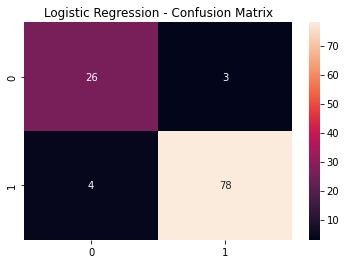

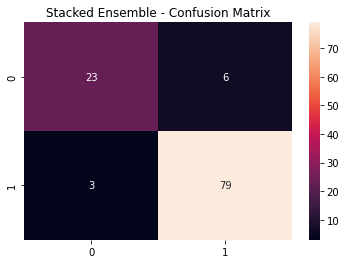

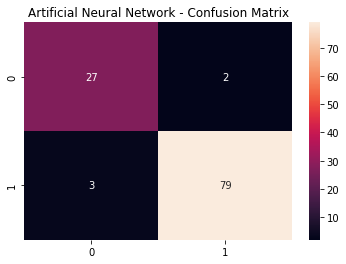

In [57]:

CM_lr=confusion_matrix(y_test,y_pred_lr)
sns.heatmap(CM_lr, annot=True)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()
CM_se=confusion_matrix(y_test,y_pred_se)
sns.heatmap(CM_se, annot=True)
plt.title("Stacked Ensemble - Confusion Matrix")
plt.show()
CM_ann=confusion_matrix(y_test,y_pred_ann)
sns.heatmap(CM_ann, annot=True)
plt.title("Artificial Neural Network - Confusion Matrix")
plt.show()

In [58]:
columnss = ['age', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'coloured_vessels', 'sex_male',
       'chest_pain_type_atypical angina', 'chest_pain_type_non-anginal pain',
       'chest_pain_type_typical angina', 'rest_ecg_ST-T wave abnormality',
       'rest_ecg_left ventricular hypertrophy', 'rest_ecg_normal',
       'st_slope_flat', 'st_slope_upsloping', 'Thalassemia_normal',
       'Thalassemia_reversible defect']
pred = pd.DataFrame(columns = columnss)
pred = pred.append(pd.DataFrame([[29.0,120.0,200.0,1.0,180.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0]],columns=columnss))
pred[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','coloured_vessels']] = scaler.transform(pred[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','coloured_vessels']])
ann_predict = ann.predict(pred) 
print(np.where(ann_predict > 0.5,1,0).flatten())

1/1 [==============================] - 0s 19ms/step
[1]
